In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Analisis exploratorio

In [2]:
# Carga dataset
df = pd.read_csv(r"D:\Data & Analytics\Proyecto Machine Learning\dataset_estudiantes.csv", low_memory=False)

print("\nPrimeras filas")
print(df.head())

print("\nInformacion general")
print(df.info())

print("\nEstadisticas descriptivas")
print(df.describe())


Primeras filas
   horas_estudio_semanal  nota_anterior  tasa_asistencia  horas_sueno  edad  \
0               8.957476      48.830601        86.640182     6.675694    25   
1              11.042524      80.825707        83.449655     4.616844    18   
2               4.510776      90.383694        74.623607     7.755246    25   
3               6.647213      81.878257        82.849841     8.592826    23   
4               1.000000      66.254179        54.539935     6.671840    21   

  nivel_dificultad tiene_tutor horario_estudio_preferido estilo_aprendizaje  \
0            Fácil          Sí                     Tarde  Lectura/Escritura   
1          Difícil          No                     Tarde                NaN   
2            Fácil          No                    Mañana  Lectura/Escritura   
3            Fácil          No                       NaN             Visual   
4            Medio          No                       NaN           Auditivo   

   nota_final  aprobado  
0       

## Preprocesamiento

In [8]:
# Identifica columnas numericas y categoricas
columnas_numericas = ["horas_estudio_semanal", "nota_anterior", "tasa_asistencia", "horas_sueno", "edad"]

columnas_categoricas = ["nivel_dificultad", "tiene_tutor", "horario_estudio_preferido", "estilo_aprendizaje"]

print("Columnas numericas:", columnas_numericas)
print("Columnas categoricas:", columnas_categoricas)

Columnas numericas: ['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia', 'horas_sueno', 'edad']
Columnas categoricas: ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']


In [ ]:
# Variables predictoras y objetivo
X = df[["horas_estudio_semanal", "nota_anterior", "tasa_asistencia",
        "horas_sueno", "edad", "nivel_dificultad", "tiene_tutor",
        "horario_estudio_preferido", "estilo_aprendizaje"]]

y = df["nota_final"]

# Preprocesamiento numerico
preprocesamiento_numerico = Pipeline(steps=[
    ("imputador", SimpleImputer(strategy="median")),
    ("escalado", StandardScaler())
])

# Preprocesamiento categorico
preprocesamiento_categorico = Pipeline(steps=[
    ("imputador", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Transformer general
preprocesador = ColumnTransformer(
    transformers=[
        ("num", preprocesamiento_numerico, columnas_numericas),
        ("cat", preprocesamiento_categorico, columnas_categoricas)
    ]
)

# Pipeline final
modelo_regresion = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", LinearRegression())
])

# Division entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo_regresion.fit(X_train, y_train)

print("Modelo entrenado correctamente.")


Modelo entrenado correctamente.


## Entranamiento y validacion del modelo de regresion

In [5]:

# Predicciones
y_pred = modelo_regresion.predict(X_test)

# Metricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo de regresion:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Resultados del modelo de regresion:
MAE: 5.82
MSE: 52.25
RMSE: 7.23
R²: 0.3613


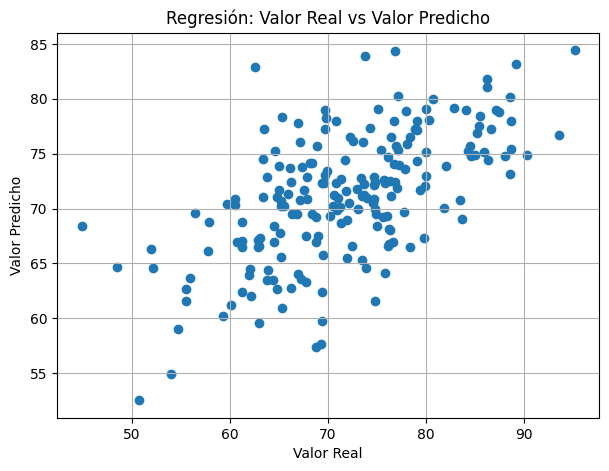

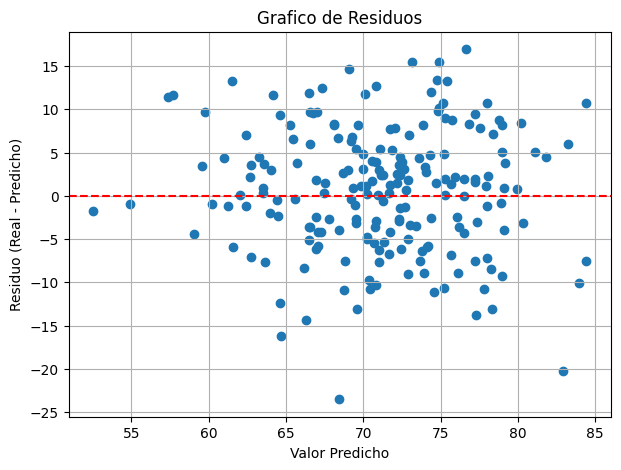

In [9]:

# Grafico real vs predicho
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Regresión: Valor Real vs Valor Predicho")
plt.grid(True)
plt.show()

# Grafico de residuos
residuos = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valor Predicho")
plt.ylabel("Residuo (Real - Predicho)")
plt.title("Grafico de Residuos")
plt.grid(True)
plt.show()


## Entrenamiento y validacion del modelo de clasificacion

In [ ]:

# Definir X e y para clasificacion
X = df.drop("aprobado", axis=1)
y = df["aprobado"]

# Dividir datos
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear pipeline de clasificacion
modelo_clasificacion = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", LogisticRegression(max_iter=200))
])

# Entrenar
modelo_clasificacion.fit(X_train_cls, y_train_cls)

# Predecir valores
y_pred_cls = modelo_clasificacion.predict(X_test_cls)

# Calcular metricas
acc = accuracy_score(y_test_cls, y_pred_cls)
prec = precision_score(y_test_cls, y_pred_cls)
rec = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

# Mostrar metricas
print("Resultados del modelo de clasificacion:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# Matriz de confusion
print("\nMatriz de confusión:")
print(confusion_matrix(y_test_cls, y_pred_cls))

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_test_cls, y_pred_cls))


Resultados del modelo de clasificación:
Accuracy: 0.9250
Precision: 0.9337
Recall: 0.9892
F1-score: 0.9606

Matriz de confusión:
[[  2  13]
 [  2 183]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.93      0.99      0.96       185

    accuracy                           0.93       200
   macro avg       0.72      0.56      0.59       200
weighted avg       0.90      0.93      0.90       200

